### 목표 : 많은 특성의 데이터셋에서 과대적합 해결

-   데이터 : perch3.csv
-   피쳐 : Length, Height, Width
-   타겟 : Weight
-   [조건]
    -   특성 추가 => degree = 5로 설정
    -   특성을 기반으로 무게 예측 ==> 지도학습 + 회귀


[1] 모듈 로딩 및 데이터 준비 <hr>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn, unpatch_sklearn

patch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data_file = "../data/perch3.csv"
perchDF = pd.read_csv(data_file)


In [4]:
perchDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


[2] 데이터 확인 <hr>


[2-1] 피쳐 타겟 분리


In [12]:
featureDF = perchDF.drop(["Weight"], axis=1)
targetDF = perchDF["Weight"]

print(f"Feature => {featureDF.shape}, Target => {targetDF.shape}")


Feature => (56, 3), Target => (56,)


[2-2] 데이터 분포 확인


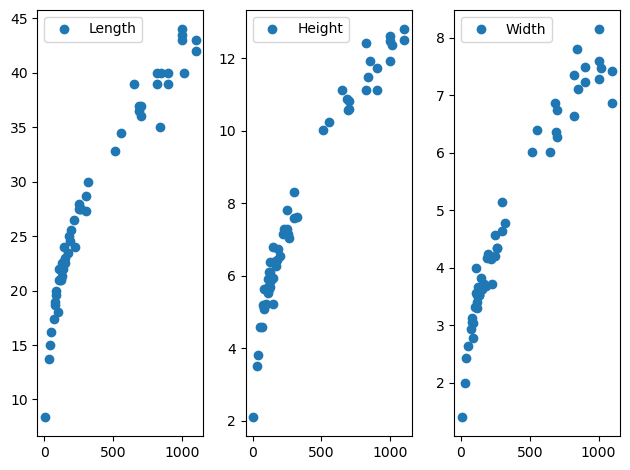

In [18]:
# Feature & Target 관계
for idx, col in enumerate(featureDF.columns, 1):
    plt.subplot(1, 3, idx)
    plt.plot(targetDF, featureDF[col], "o", label=col)
    plt.legend()
plt.tight_layout()
plt.show()

## 직선의 형태는 아니지만 곡선의 양의 방향/비례하는 분포 확인


[3] 데이터 가공 <hr>

-   특성 추가
-   특성 스케일링


[3-1] 특성 추가


In [21]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(featureDF)

poly_feature = poly.transform(featureDF)


In [22]:
print(
    f"특성 추가 => {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out()}"
)


특성 추가 => (56, 55)
['Length' 'Height' 'Width'] => ['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Height Width^4' 'Width^5']


[3-2] 피쳐 스케일링


-   훈련용 & 테스트용 분리


In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    poly_feature, targetDF, random_state=5
)


In [26]:
print(
    f"TRAIN => {x_train.shape}, {y_train.shape} TEST => {x_test.shape}, {y_test.shape}"
)


TRAIN => (42, 55), (42,) TEST => (14, 55), (14,)


-   스케일링 진행


In [27]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)


StandardScaler()

In [28]:
scaled_x_train = std_scaler.transform(x_train)
scaled_x_test = std_scaler.transform(x_test)


[4] 학습 진행 => 회귀


In [29]:
lr_model = LinearRegression()
lr_model.fit(scaled_x_train, y_train)


LinearRegression()

In [30]:
train_score = lr_model.score(scaled_x_train, y_train)
test_score = lr_model.score(scaled_x_test, y_test)

print(f"TRAIN SCORE => {train_score}, TEST SCORE => {test_score}")


TRAIN SCORE => 1.0, TEST SCORE => -38.767868061603046


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결

-   Ridge : 모든 피쳐의 가중치를 0에 가깝게 조절
-   Lasso : 특정 피쳐의 가중치를 0으로해서 차원 축소 부여


-   [규제 1] Ridge


In [36]:
ridge_model = Ridge(max_iter=100)
ridge_model.fit(scaled_x_train, y_train)


Ridge(max_iter=100)

In [37]:
train_score = ridge_model.score(scaled_x_train, y_train)
test_score = ridge_model.score(scaled_x_test, y_test)

print(f"[Ridge Model] TRAIN SCORE => {train_score}, TEST SCORE => {test_score}")


[Ridge Model] TRAIN SCORE => 0.9874355208005008, TEST SCORE => 0.9914491207423642


In [38]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)


None [ 1.83176874e+00 -7.23677789e+00  1.03067055e+01  1.57775249e+01
  1.18446480e+01  1.67466597e+01  9.57952490e+00  1.47797173e+01
  2.48615142e+01  1.85163425e+01  1.67577526e+01  1.46142404e+01
  1.58382863e+01  1.38108100e+01  1.64490445e+01  1.56379186e+01
  1.39352928e+01  1.71480760e+01  2.50779150e+01  1.42694832e+01
  1.39921892e+01  6.23690826e+00  1.41806030e+01  6.32646330e+00
  2.93976268e+00  1.47629117e+01  7.00986521e+00  3.97399179e+00
  5.70584401e+00  1.56796396e+01  8.23737024e+00  5.75159002e+00
  8.24469917e+00  1.54675618e+01  5.86439125e+00  6.81074624e+00
 -5.88111799e+00  8.02129126e+00 -4.97701429e+00 -1.36851639e+01
  9.44134707e+00 -3.67900627e+00 -1.22792895e+01 -1.61590708e+01
  1.10232306e+01 -2.01766706e+00 -1.03096090e+01 -1.36546600e+01
 -1.21067571e+01  1.27255386e+01 -1.99919223e-02 -7.79070771e+00
 -1.04001988e+01 -7.93557014e+00 -7.20881695e-01] 365.6404761904762


In [39]:
# ====> 최적의 규제 강도 설정값 찾기
alphas = [0.1, 1.0, 10.0, 20.0, 30.0]
ridge_score = [[], []]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_x_train, y_train)
    train_score = ridge_model.score(scaled_x_train, y_train)
    test_score = ridge_model.score(scaled_x_test, y_test)

    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)


In [41]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]


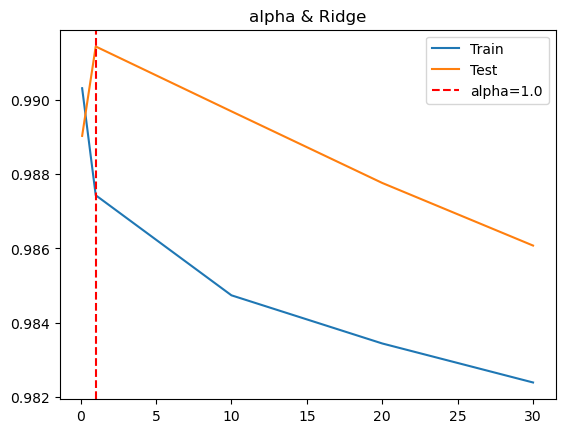

In [45]:
# 학습 및 테스트 점수 기반 시각화
plt.plot(alphas, ridge_score[0], label="Train")
plt.plot(alphas, ridge_score[1], label="Test")
plt.axvline(x=best_alpha, linestyle="--", color="red", label=f"alpha={best_alpha}")
plt.legend()
plt.title("alpha & Ridge")
plt.show()


[규제 2] Lasso


In [46]:
lasso_model = Lasso()
lasso_model.fit(scaled_x_train, y_train)


c:\Users\KDP-25\.conda\envs\MachineLearning39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+03, tolerance: 4.884e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [49]:
train_score = lasso_model.score(scaled_x_train, y_train)
test_score = lasso_model.score(scaled_x_test, y_test)

print(f"[Lasso Model] TRAIN SCORE => {train_score}, TEST SCORE => {test_score}")


[Lasso Model] TRAIN SCORE => 0.9865761752892273, TEST SCORE => 0.9912639062921962


In [50]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)


1000 [ 0.          0.          0.          8.39678696  0.          0.
 13.70952971  0.         87.23199451 91.06954235 16.61716411  0.
 35.69479723  0.          0.         46.93195311  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         41.8984421
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.        ] 365.6404761904762


In [57]:
# ====> 최적의 규제 강도 설정값 찾기
alphas = [0.1, 1.0, 10.0, 20.0, 30.0]
lasso_score = [[], []]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=30000)
    lasso_model.fit(scaled_x_train, y_train)
    train_score = lasso_model.score(scaled_x_train, y_train)
    test_score = lasso_model.score(scaled_x_test, y_test)

    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)


In [58]:
# 테스트 점수가 가장 높은 알파
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]


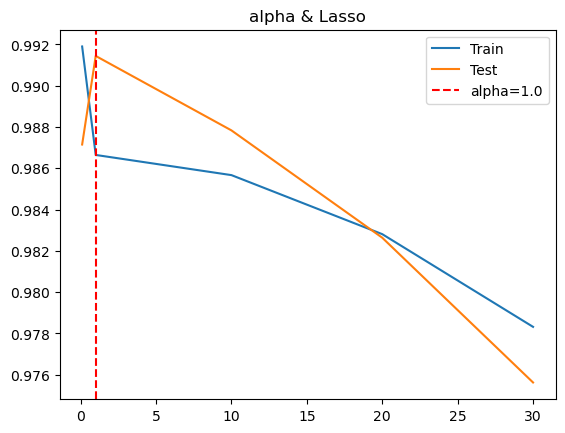

In [60]:
# 학습 및 테스트 점수 기반 시각화
plt.plot(alphas, lasso_score[0], label="Train")
plt.plot(alphas, lasso_score[1], label="Test")
plt.axvline(x=best_alpha, linestyle="--", color="red", label=f"alpha={best_alpha}")
plt.legend()
plt.title("alpha & Lasso")
plt.show()
